# Contents
This notebook contains a project consisting of three parts:
1- Bioinformatics, which looks in detail at the structure of Dopamine Receptor D2 (DRD2) and its' homology with similar receptors. 
2- Cheminformatics, which looks at the binding of haloperidol to DRD2. Additionally several machine learning models are trained to predict the binding affinity of new molecules to DRD2.
3- Docking, which looks at the docking of some of these new molecules to DRD2 by using VINA docking.

The goal of the report is to find a molecule with a better predicted binding affinity to haloperidol based on the models.

# Bioinformatics:

Dopamine Receptor D2 (DRD2) is a G-coupled protein receptor consisting of 443 amino acids[1]. DRD2 is one of the five dopamine receptors, ranging from D1 to D5. DRD2 is a transmembrane protein and binds to inhibitory G proteins in the cells. Through activation of DRD2 by dopamine, adenylyl cyclase is inhibited. This means DRD2 functions as a regulator of cAMP levels in the cells[2]. This regulation has many different functions, including but not limited to learning, sleep and attention[3]. DRD2 receptors are most present in the striatum, but are also found in other parts of the human body.

DRD2 is a drug target for many different types of diseases. Most notably, agonists of DRD2 are used to treat Parkinson's disease [4,5]. Parkinson's disease is caused by too little dopamine activating DRD2, so agonists are used to treat it.  Ropinirole (ATC: N04BC) and pramipexole (ATC: N04BC) are examples of such agonists. Additionally, DRD2 is also a drug target to treat psychotic disorders caused by too much dopamine activating DRD2. To treat this, antagonists such as the most commonly used antipsychotic drug haloperidol (ATC: N05A) can be used by patients (Figure 1).

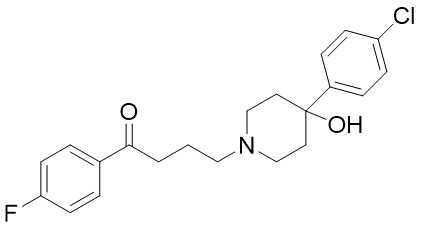
Figure 1: haloperidol, drawn using Chemdraw

Comparing human DRD2 to the most similar human protein Dopamine receptor D3 (DRD3) and DRD2 in chimpanzees show that the protein is similar to chimpanzees, but slightly different to human DRD3 (Figure 2). This is to be expected since the genome is largely shared between different organisms, especially between an organism so close to humans. Additionally DRD3 is a different protein so will not be exactly the same as DRD2 even if they are both dopamine receptors. Information on the three proteins:

- Name = D(2) dopamine receptor

Accessions: P14416 (Q9NZR3 and Q9UPA9 secondary)
Length = 443 A
Identity = P14416 DRD2_HUMAN
Species = Homo sapiens(Human)
Status = UniProtKB reviewed (Swiss-Prot)
Mass = 50,619

- Name = D(2) Dopamine Receptor

Accessions = P60026  (Q5IS49 secondary)
Length = 443 A
Identity = P60026 DRD2_PANTR
Species = Pan troglodytes (Chimpanzee) 
Status = UniProtKB reviewed (Swiss-Prot)
Mass = 50,619 Da

- Name = D(3) Dopamine Receptor

Accessions = P35462 (A1A4V5 and Q4VBM8 secondary)
Length = 400 AA
Identity = P35462_HUMAN
Species = Homo Sapiens (Human)
Status = UniProtKB reviewed (Swiss-Prot)
Mass = 44,195 Da

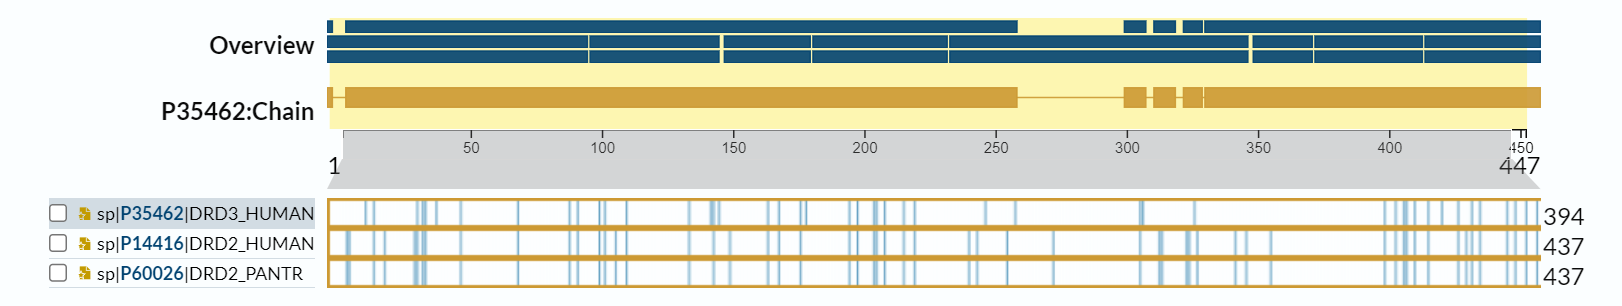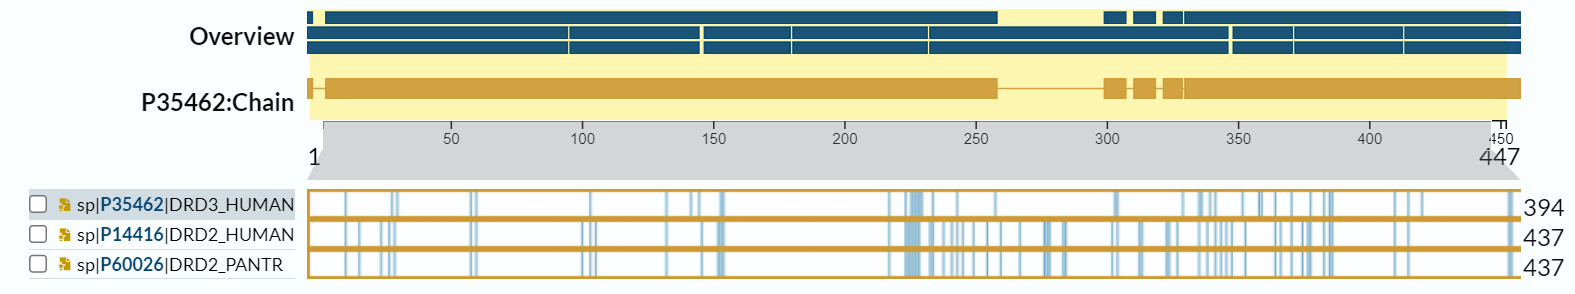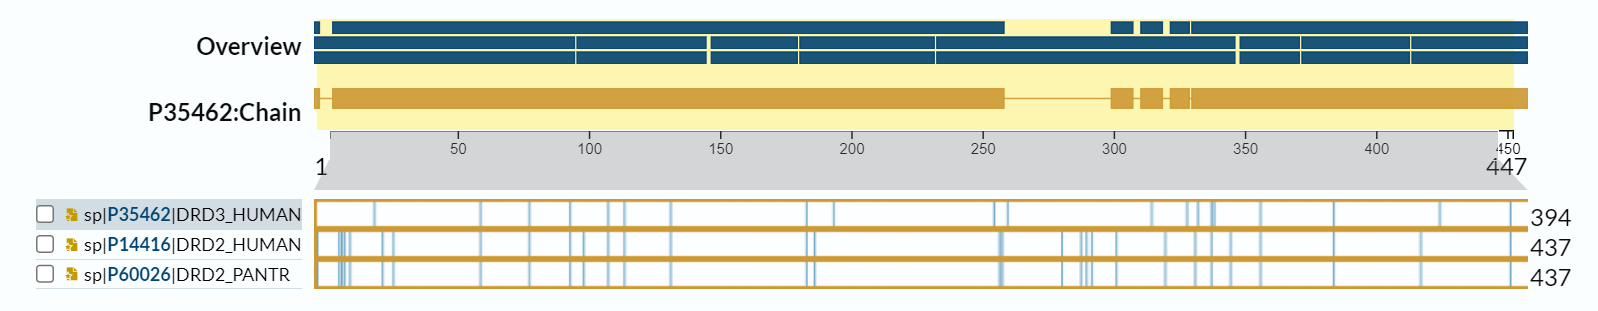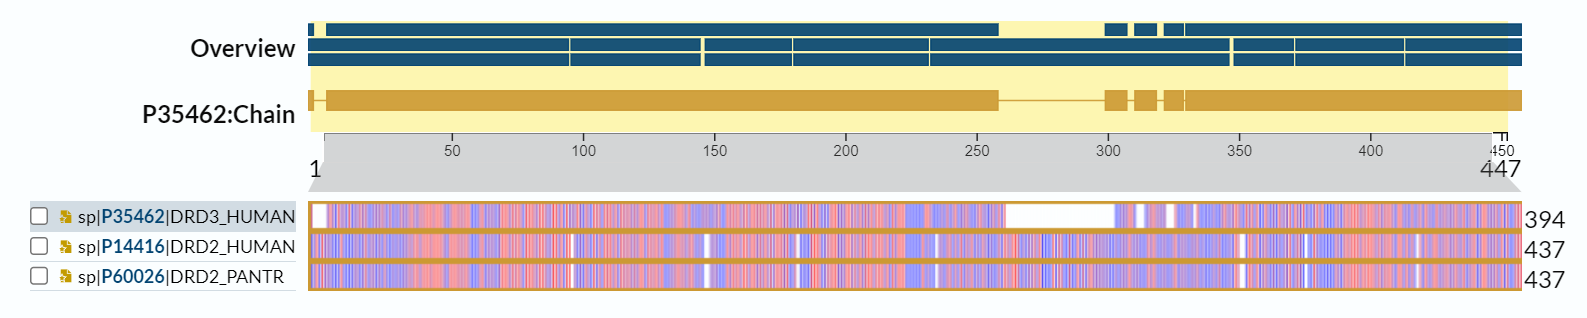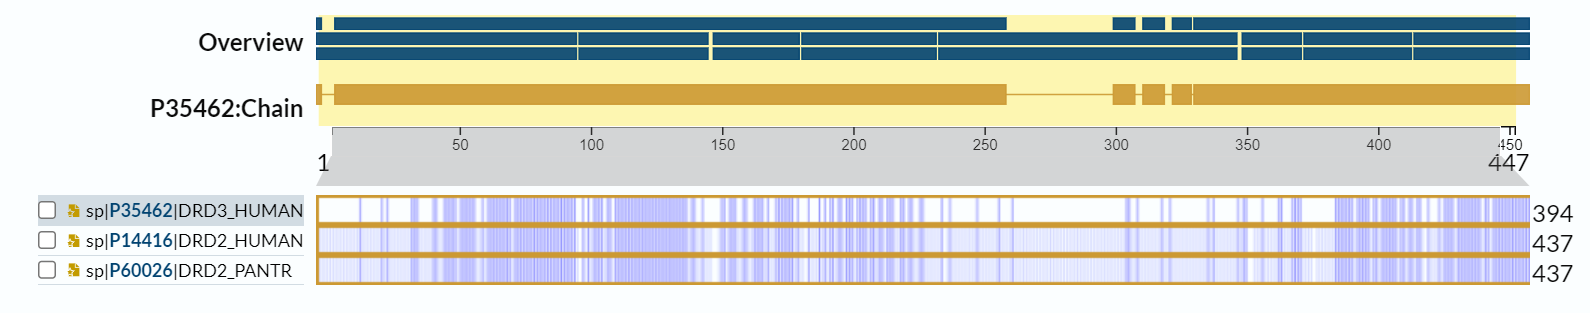
Figure 2: Comparison of human DRD2, DRD3 and DRD of chimpanzees. From top to bottom the images show the similarities for: Aromaticity, positive, negative, hydrophibicity and similarity. The figure was made using uniprot[6].

Next, a 3D structure of DRD2 will be aligned with its' most similar protein found on Protein Data Bank (PDB) [7]. This is C-X-C chemokine receptor type 4. The two proteins were aligned based on their sequence (Figure 3).

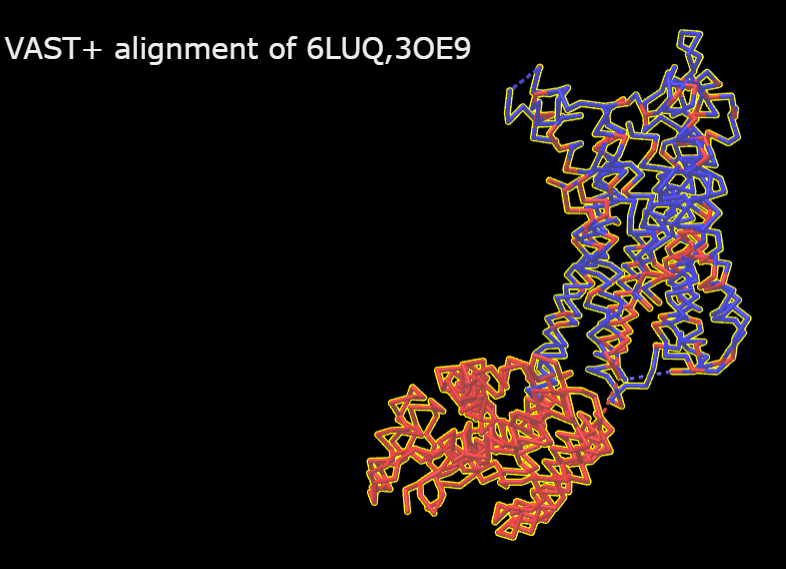
Figure 3: alignment of DRD2 (6LUQ) and C-X-C chemokine receptor type 4 (3OE9) based on sequance alignment. The figure was made using the national center for biotechnology information (NCBI) website[8].

Following this, the crystal structure of DRD2 and haloperidol was looked at in detail (Figure 4). Zoomed in on the binding site of DRD2, several interactions between the protein and haloperidol can be observed (Figure 5). The Protein-Ligand Interaction Profiler (PLIP) lists 7 hydrophobic interactions, 1 salt bridge, 3 pi stacking interactions and 1 hydrogen bond [8]. This hydrogen bond consists of the 429th amino acid of DRD2 as a hydrogen bond donor and the hydroxy group of haloperidol as a hydrogen bond acceptor. This hydrogenbond looks very interesting for improvement, as the bond distance seems to be quite large. This interaction could be a potential site for improvement.
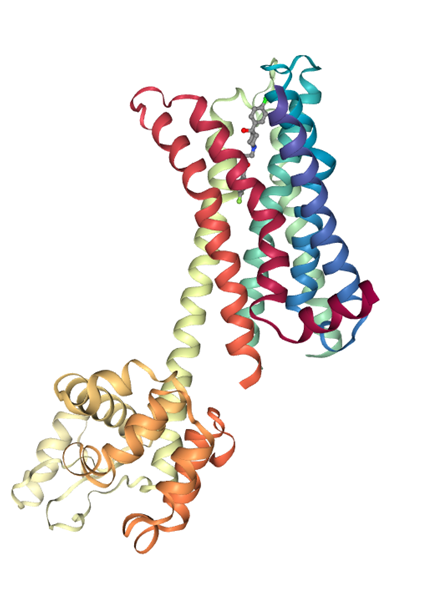
Figure 4: Haloperidol bound to DRD2, made using PDB [7] and CBR_Teaching jupyter notebook [9]

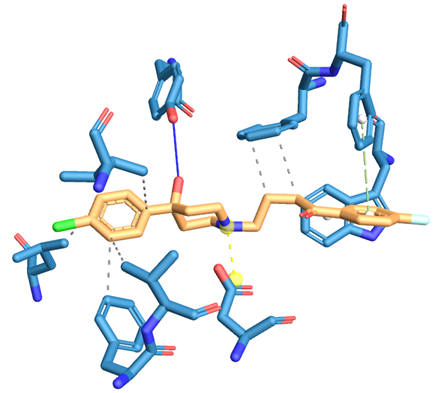
Figure 5: Binding site of haloperidol in DRD2, made using PLIP [8].

# Cheminformatics

In order to train a model which can predict the activity of compounds binding to DRD2, several machine learning models were trained using the code provided by the jupyter notebook CBR_Teaching [9]. However, before the models could be made, binding data of ligands to DRD2 had to be acquired and filtered using CBR_Teaching code. To do this, data for DRD2 (CHEMBL217) was acquired from CHEMBL[10]. This gave 22045 data points, and a classifyer was introduced. Using the pCHEMBL value, the compounds were divided into two groups. Compounds with a pCHEMBL value higher or equal to 6.5 were classified as active, while compounds with a lower pCHEMBL value than 6.5 were classified as inactive. This resulted in 7671 active compounds and 14374 inactive compounds. Next the data points consisting of functional assays were removed from the dataset which left a total of 16725 data points.



Several machine learning models were trained using the prepared dataset. The SMILES of the compounds were used to generate Maccs and morgan3 fingerprints. Next, the dataset was split into a training set consisting of 13316 compounds and a testing set consisting of 3330 compounds. 

Three different models were trained using the Maccs fingerprints: Random Forest (RF), Support Vector Machine (SVM) and Artificial Neural Network (ANN). The models were classification models which considered a pCHEMBL value higher than or equal to 6.5 as active and a pCHEMBL value lower than 6.5 as inactive. The results for these three models are summarized in table 1 and figure 6. 

The random Forest model had a sensitivity of 0.70, specificity of 0.85 and an area under the curve of 0.87. These results were quite good as this means true positives were found a lot more often than false positives. 

For the SVM model, a sensitivity of 0.69, specificity of 0.86 and an area under the curve of 0.85 were determined. This means the true positive rate is very slightly lower than for the RF model, and the true negative rate slightly higher. 

Finally, the ANN model was generated by training a multi-layer perceptron classifier with 3 layers consisting of 5 neurons. The ANN model had a sensitivity of 0.64, specificity of 0.79 and an area under the curve of 0.81. This means it performs worst of the models in all aspects. 

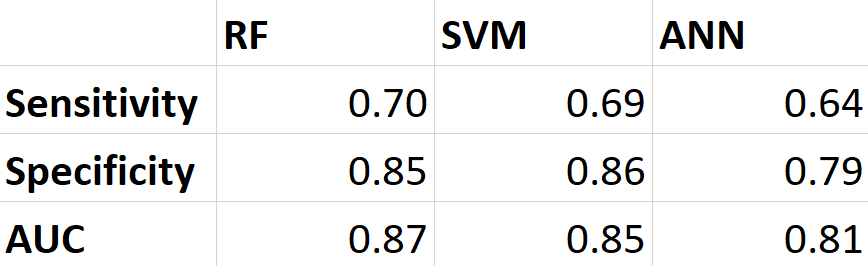
Table 1: Table depicting the sensitivity, specificity and area under the curve (AUC) for the Random forest (RF), Support vector machine (SVM) and Artificial Neural Network (ANN) models[9].
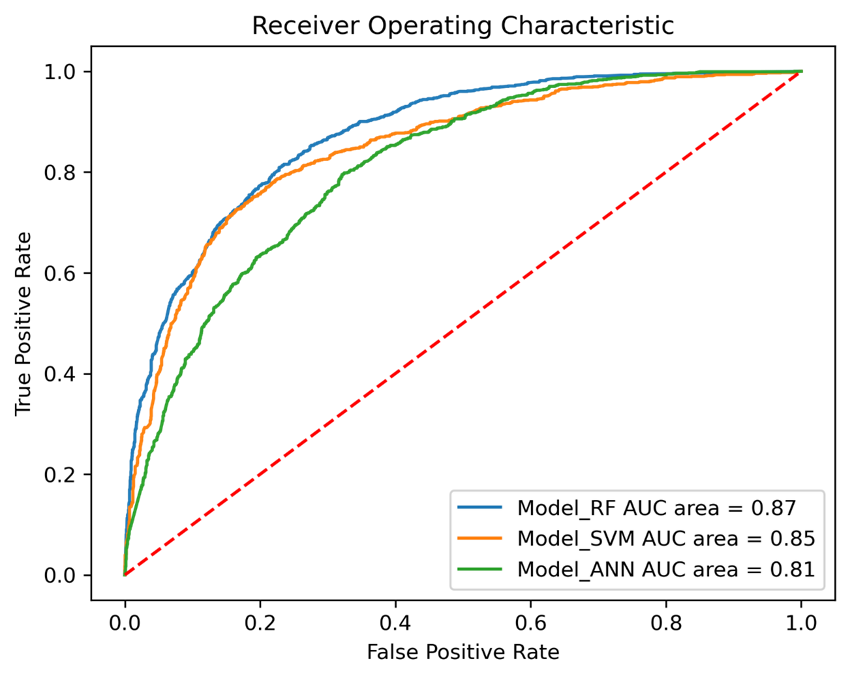
Figure 6: Results of training the three classification models[9].

Following this, 3 fold cross validation was performed for the three models. The results are summarized in table 2. The results are similar to those of the previous measurements, with the RF model and SVM model being very similar with a mean AUC of 0.86 and 0.85 respectively. These two models show better results than the ANN model which has a mean AUC of 0.85.

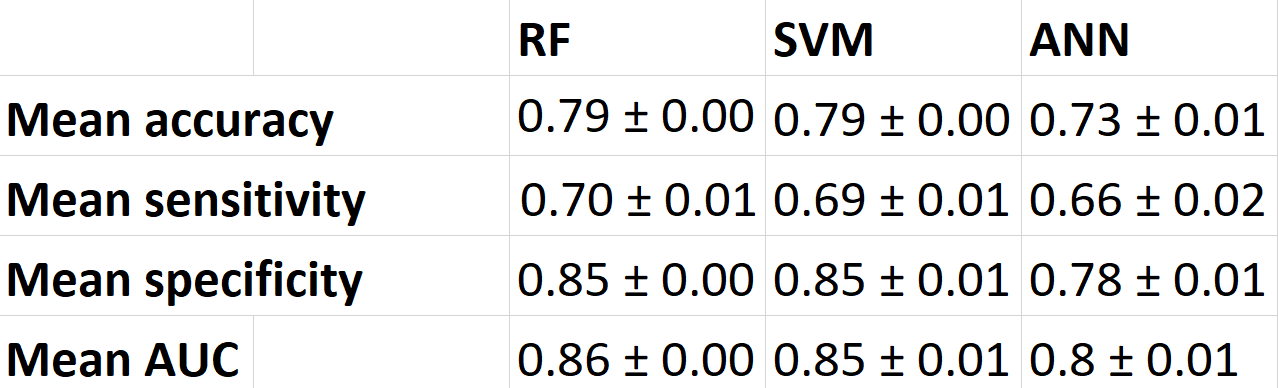
Table 2: Table depicting the mean accuracy, mean sensitivity, mean specificity and mean area under the curve (AUC) for the Random forest (RF), Support vector machine (SVM) and Artificial Neural Network (ANN) models[9].

Next the models were cross validated again, however instead of usin MACCS keys, the Morgan fingerprint with a radius of 3 was used. Since the RF model and the SVM model performed very similarly in the previous models with the RF model performing slightly better, the SVM model was not cross validated this way to save time. The results are summarized in table 3. Both models show an increase in performance, with especially the ANN model increasing from a mean AUC of 0.80 to 0.85 when changing the fingerprints from MACCS to Morgan3. However, the RF model is still the most predictive, so this model was chosen to train a regression model which can be used to predict the pCHEMBL value of new molecules for DRD2.

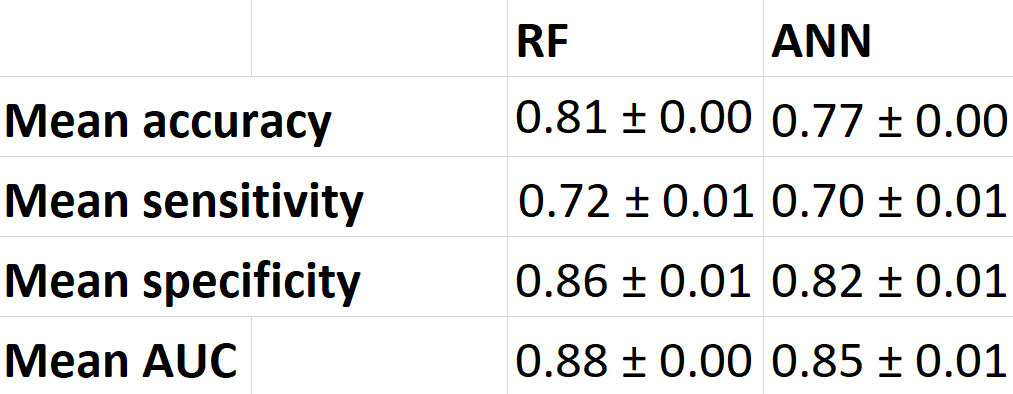
Table 3: Table depicting the mean accuracy, mean sensitivity, mean specificity and mean area under the curve (AUC) for the Random forest (RF) and Artificial Neural Network (ANN) models[9].

The data points were once again randomly split into a training set consisting of 13316 molecules and a training set consisting of 3330 molecules. The mean absolute error (MAE) and root mean squared error (RMSE) were determined and summarized in table 4. The MAE was 0.47, and the RMSE was 0.66 These values indicate that the model is capable of quite accurately predicting the pCHEMBL values of molecules, which means it could be used for some new molecules.

Table 4: Table depicting the mean absolute error (MAE) and root mean squared error (RMSE) for a random forest regression model [9]. 

# Design of new ligand

Several new drugs were designed based on haloperidol (Figure 7). After attempting several changes to parts of the drug, such as shortening the carbon chain and changing the halogens to different halogens no positive changes to the predicted pCHEMBL value were found. Focusing on the hydroxy group which is part of the hydrogen bond between DRD2 and haloperidol however did show some possibilities. Introducing a methylamine group in the place of the hydroxy group, the pCHEMBl value was maximized to 8.79. This is slightly higher than the predicted pCHEMBL value of 8.78 for the original haloperidol. However, this is not a meaningful difference. The reported pCHEMBl values for haloperidol and DRD2 on CHEMBL ranges from about 8.50 to 9.00, so the RF regression model seems to be quite accurate. Although the difference in pCHEMBl value is very small, it was decided to continue with the methylamine compound. This is because it seems to have similar or very slightly better pCHEMBl values. Previous research has also shown that a many drugs targeting DRD2 have side effects because of also targeting other DRD receptors [11]. This means that a new ligand with similar binding to DRD2 is still interesting if the compound does not bind as well to other DRD proteins. 

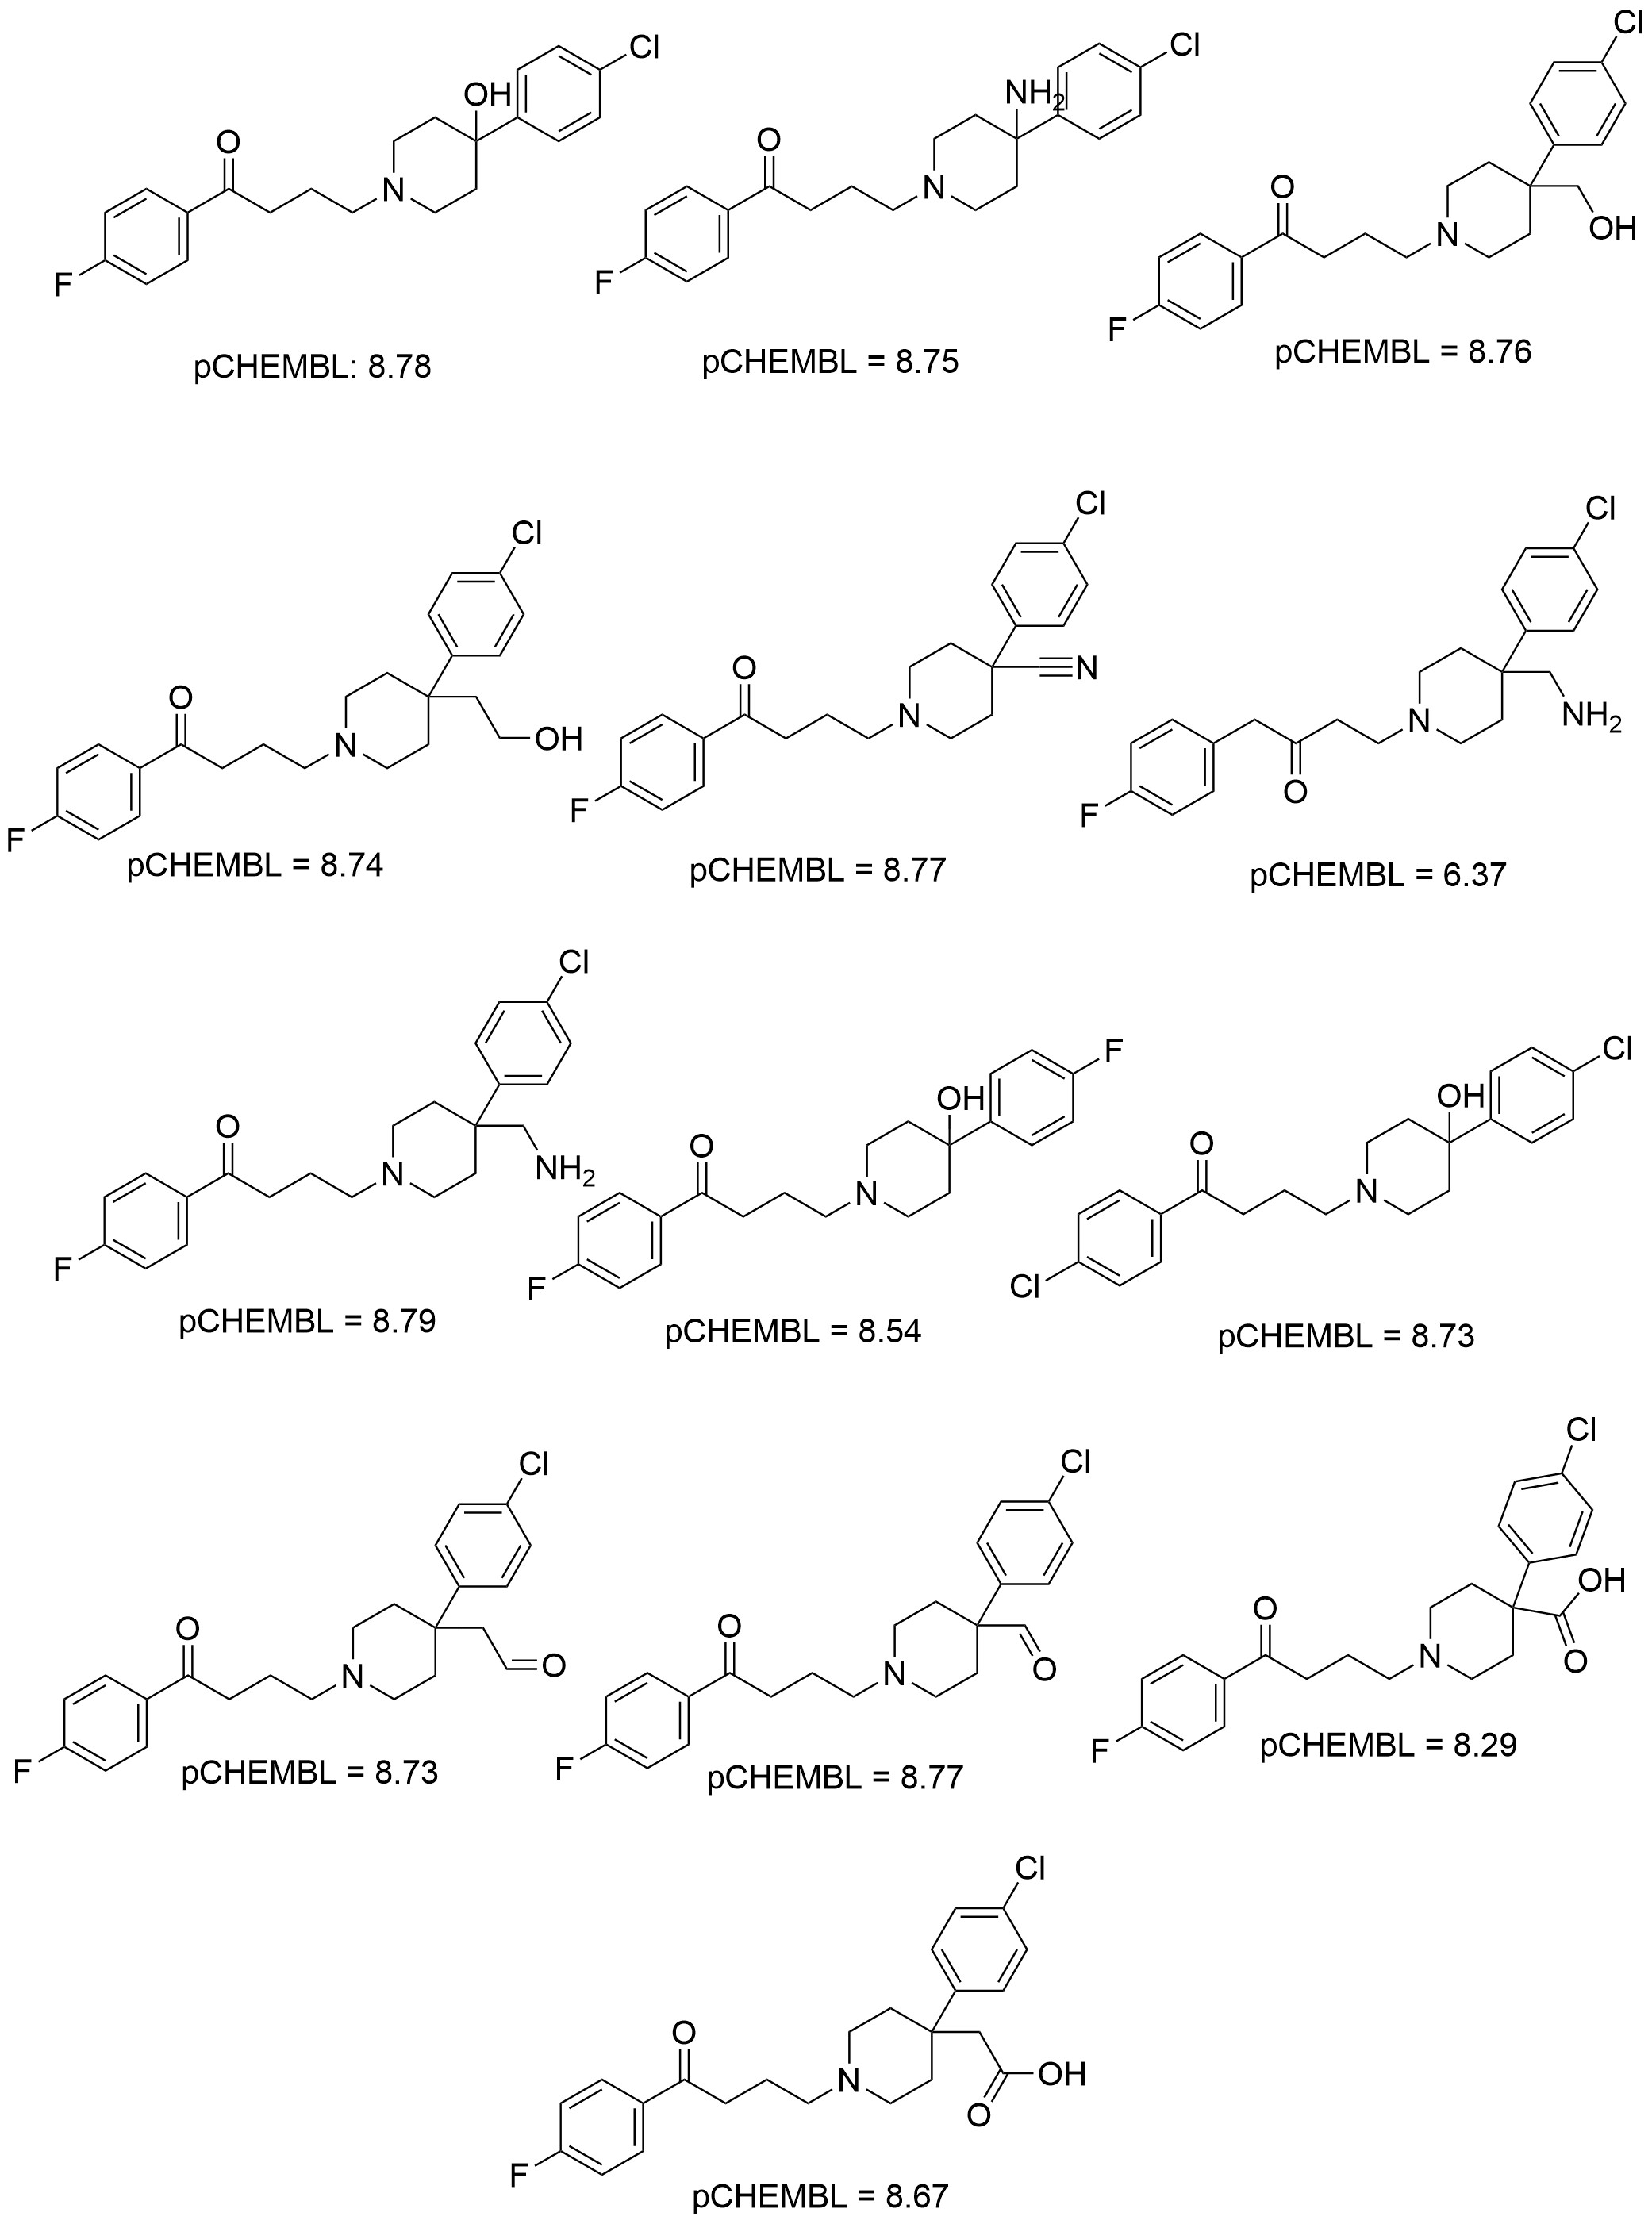
Figure 7: A selection of compounds and their pCHEMBL value as predicted by the RF model, drawn in Chemdraw

# Docking of new ligand

In order to dock the new ligand with the methylamine group in DRD2, Autodock Vina was used. After performing the docking using the code provided by the CBR_Teaching jupyter notebook, the affinity was predited to be -7.647 kcal/mol and a pCHEMBL value of 5.61. This is very different from the results predicted by the RF regression model. Looking at figure 8, it is not very surprising however. Figure 8 shows that the new ligand with the methylamine group has the wrong orientation and thus will have a very different pCHEMBL value from the RF regression model. Many docking attempts were performed, however, none of the attempts resulted in the correct orientation of the ligand. Additionally, docking using some of the other compounds also did not result in the correct orientation of the molecule. For example, the compound with a aldehyde instead of hydroxy group with a pCHEMBL value of 8.77 as predicted by the RF regression model was also tried (Figure 9). The predicted affinity was -7.739 kcal/mol and the pCHEMBL value was 5.68. This is also far lower than the value of 8.77 as predicted by the RF regression model.

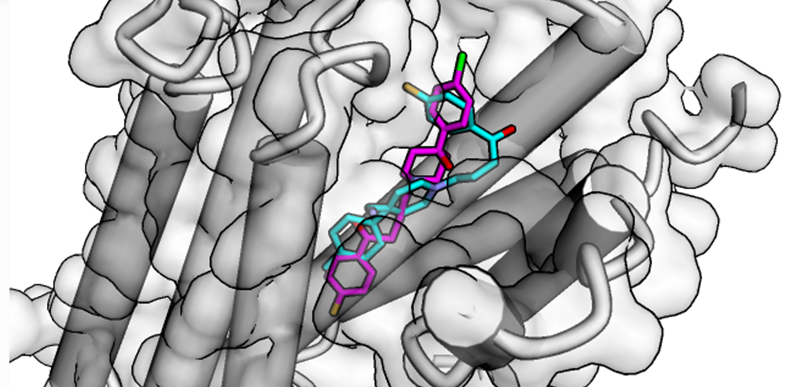
Figure 8: Docking of haloperidol (magenta) and the new ligand (cyan)[9]. The orientation of haloperidol is correct, however the orientation of the new ligand is incorrect.

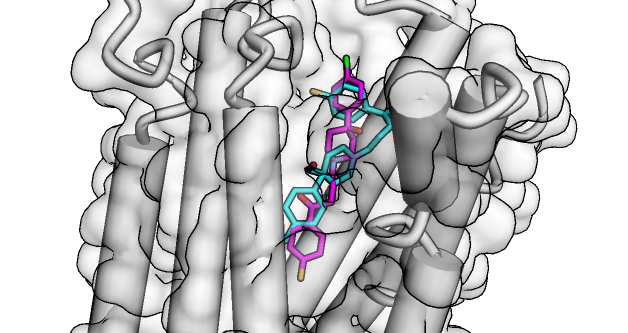
Figure 9: Docking of haloperidol (magenta) and a new compound with an aldehyde instead of hydroxy group (cyan)[9]. The orientation of haloperidol is correct, however the orientation of the new ligand is incorrect.



# Conclusion and future perspective

In conclusion, a new ligand that better binds DRD2 than haloperidol was not definitively proven in this project. Although a compound was found with a slightly higher predicted pCHEMBL value according to the RF regression model, the difference was not significant. Docking of the designed compounds also did not result in positive results as the ligands were wrongly orientated. However further research can still be done on the new ligand with a methylamine group instead of a hydroxy group. Because of many antipsychotic drugs binding to other DRD proteins, there are many side effects[11]. Future research could look at the binding of the new ligand to other DRD proteins. 

The models used in this report indicate that a Random Forest model with the Morgan3 fingerprint results in the best predictive model. Further improvements could be made to the model. In this project, a random split for the training and testing sets was used. However, since DRD2 has many different activity data points, it might be better to use a temporal split to prevent overfitting. 

The docking of the new ligands was not succesful, so this process needs to be reviewed for future research. A possibility is to attempt docking with different protein-ligand docking programs and see whether this improves the orientation of the new ligands. 

# References

[1]Bhatia A, Lenchner JR, Saadabadi A. Biochemistry, Dopamine Receptors. 2023 Jun 22. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2023 Jan–. PMID: 30855830.
[2]Jackson DM, Pharmacology and Therapeutics. 1994 DOI: 10.1016/0163-7258(94)90041-8
[3]Mishra A, Journal of Experimental Neuroscience, 2018  DOI: 10.1177/1179069518779829
[4]Luyu Fan, Nature communications, 2020 https://doi.org/10.1038/s41467-020-14884-y
[5]Parkinson’s UK, parkinsons.org.uk
[6]Uniprot
[7]6LUQ, Mol*, D. Sehnal, RCSB PDB
[8]Protein-Ligand Interaction Profiler, 6LUQ-GMJ
[9]https://github.com/jesperswillem/CBR_teaching 
[10]CHEMBL database https://www.ebi.ac.uk/chembl/ 
[11]Wang et al. 2018 doi:10.1038/nature25758